# Auto Regressive Network Inference 

To run this notebook:

1. Install the [julia-1.5.3](https://julialang.org/downloads/)

2. Install [PyPlot](https://github.com/JuliaPy/PyPlot.jl) package. To enter in the package manager, just type `]` and from the package manager prompt do a
```
(@v1.5) pkg> add PyPlot
```

3. Install the unregistered [PlmDCA](https://github.com/pagnani/PlmDCA) package. From the package manager prompt do a
```
(@v1.5) pkg> add https://github.com/pagnani/PlmDCA
```

4. Install the ipynb interface in julia, you should add the [IJulia](https://github.com/JuliaLang/IJulia.jl) package using the package manager. Again, from the package manager prompt do a
```
(@v1.5) pkg> add IJulia 
```
Exit the Package Manager (type `backspace` or `delete`) and from julia prompt do a 
```
julia> using IJulia
julia> notebook()
```
The ipynb file manager should open a page on your browser and from there you should navigate to this notebook.


## Load ArDCA package 

The following cell loads the package `ArDCA` on `nprocs` workers (here `nprocs=8`). The first time it takes a while. 

* The `mypkg` variable should be set to your `path/to/package` dir.

* The `datadir` variable points to the `five families autoregressive` path we shared.

In [1]:
mypkgdir = joinpath(ENV["HOME"],"CODE/ArDCA")
datadir=joinpath(ENV["HOME"],"Dropbox","five families autoregressive") # put here your path
cd(mypkgdir)
using Distributed, PyPlot
nprocs = 8
addprocs(nprocs) # choose the number of cores that you want to use (here 
@everywhere using Pkg
@everywhere Pkg.activate(".")
@everywhere using ArDCA
@everywhere using PlmDCA
include(joinpath(mypkgdir,"notebook/script.jl")); # a script with some utilities

      From worker 3:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 5:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 2:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 4:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 7:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 9:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 8:	 Activating environment at `~/CODE/ArDCA/Project.toml`
      From worker 6:	 Activating environment at `~/CODE/ArDCA/Project.toml`
 Activating environment at `~/CODE/ArDCA/Project.toml`
┌ Info: Precompiling ArDCA [fc7e833f-a3b9-439d-ae82-c6ad11a3e54b]
└ @ Base loading.jl:1278


## Define the protein family 

The following cell assumes that `datadir` is the `five families autoregressive` directory we shared.

The `out` strcture is defined in the `script.jl` file.
```
mutable struct AnalOut
    arnet # the ArDCA inferred model parameters
    arvar # the internal variables
    resori::Union{PlmOut,Nothing} # the PlmDCA output of the original MSA
    resgen::Union{PlmOut,Nothing} # the PlmDCA output of the generated MSA
    rocori::Union{Nothing,Array{Tuple{Int64,Int64,Float64,Float64}}} # score of original MSA
    rocgen::Union{Nothing,Array{Tuple{Int64,Int64,Float64,Float64}}} # score of generated MSA
    Zgen::Union{Nothing,Array{Int,2}}
end

In [2]:
family=joinpath(datadir,"PF14")
out = AnalOut(nothing,nothing,nothing,nothing,nothing,nothing,nothing);

## Run ArDCA analyis

beside `lambdaJ, lambdaH`, possible keywork arguments are (with their default value):

* `epsconv::Real=1.0e-5` (convergenge parameter)

* `maxit::Int=1000` (maximum number of iteration - don't change)

* `verbose::Bool=true` (set to `false` to suppress printing on screen)

* `method::Symbol=:LD_LBFGS` (optimization method)

* `permorder::Union{Symbol,Vector{Ti}}=:ENTROPIC` (permutation order). Possible values are: `[:NATURAL, :ENTROPIC, :REV_ENTROPIC, :RANDOM]` or a custom permutation vector.





In [3]:
runardca!(out,family,lambdaJ=1e-6, lambdaH=1e-6);

removing duplicate sequences... done: 13600 -> 8871
theta = 0.33088461264010915 threshold = 17.0
M = 8871 N = 53 Meff = 2950.925530761667
      From worker 2:	site = 1	pl = 0.0340	time = 5.2828	status = FTOL_REACHED
      From worker 2:	site = 2	pl = 0.1170	time = 0.3142	status = FTOL_REACHED
      From worker 2:	site = 3	pl = 0.1395	time = 0.3519	status = FTOL_REACHED
      From worker 3:	site = 8	pl = 0.3596	time = 6.2837	status = FTOL_REACHED
      From worker 2:	site = 4	pl = 0.2205	time = 0.4116	status = FTOL_REACHED
      From worker 2:	site = 5	pl = 0.2758	time = 0.6291	status = FTOL_REACHED
      From worker 3:	site = 9	pl = 0.5847	time = 1.0936	status = FTOL_REACHED
      From worker 2:	site = 6	pl = 0.4155	time = 0.9459	status = FTOL_REACHED
      From worker 4:	site = 15	pl = 1.0009	time = 7.9623	status = FTOL_REACHED
      From worker 2:	site = 7	pl = 0.3602	time = 1.3520	status = FTOL_REACHED
      From worker 3:	site = 10	pl = 0.4759	time = 2.3516	status = FTOL_REACHED
  

## Sampling

The following produces `Msample` samples. By default, `Msample` is number of samples from the original alignment, but it can be changed as a keyword argument. We also run PlmDCA on the true alignment, and the generated one.

In [4]:
sample_and_analyze_results!(out,family)


      From worker 8:	site = 42	 pl = 0.2682	 time = 1.0524	exit status = FTOL_REACHED
      From worker 9:	site = 48	 pl = 0.0774	 time = 1.2597	exit status = FTOL_REACHED
      From worker 5:	site = 22	 pl = 2.4594	 time = 1.7938	exit status = FTOL_REACHED
      From worker 2:	site = 1	 pl = 1.5107	 time = 1.9067	exit status = FTOL_REACHED
      From worker 7:	site = 36	 pl = 1.9025	 time = 2.0392	exit status = FTOL_REACHED
      From worker 3:	site = 8	 pl = 2.3848	 time = 2.0818	exit status = FTOL_REACHED
      From worker 4:	site = 15	 pl = 2.3046	 time = 2.1230	exit status = FTOL_REACHED
      From worker 6:	site = 29	 pl = 2.2547	 time = 2.2261	exit status = FTOL_REACHED
      From worker 8:	site = 43	 pl = 2.3820	 time = 2.2441	exit status = FTOL_REACHED
      From worker 2:	site = 2	 pl = 0.1336	 time = 1.5797	exit status = FTOL_REACHED
      From worker 7:	site = 37	 pl = 0.5627	 time = 1.4959	exit status = FTOL_REACHED
      From worker 9:	site = 49	 pl = 2.0526	 time = 2.402

## Plotting  the results

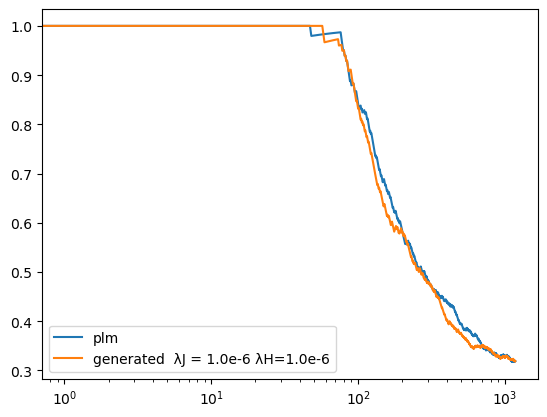

(0.7022602821872387, 1673.1688090637567)

In [24]:
include("notebook/script.jl")
plotres(out)